In [24]:
import json
import pandas as pd

validation_losses = []
# Load logged losses
with open("Finetune/validation_losses_convirt.json", "r") as f:
    for line in f:
        validation_losses.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(validation_losses)

df


,batch_idx,loss,preds,labels
0,0,0.810668,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
1,1,0.794019,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,0.319408,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
3,1,0.330612,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2,0.393436,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
1423,57,0.299825,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1424,58,0.274710,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1425,59,0.452927,"[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1426,60,0.258042,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
# Identify problematic batches
sorted_batches = df.sort_values(by="loss", ascending=False)
sorted_batches

,batch_idx,loss,preds,labels
0,0,0.810668,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
1,1,0.794019,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
673,51,0.598908,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ..."
983,51,0.572013,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ..."
1169,51,0.568532,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ..."
...,...,...,...,...
822,14,0.227242,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1251,9,0.224308,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1313,9,0.224288,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1132,14,0.218355,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [28]:
sorted_batches.to_excel('validation_output.xlsx', index=False)

In [29]:
preds = sorted_batches.iloc[2]['preds']
labels = sorted_batches.iloc[2]['labels']

different_indices = [i for i, (p, l) in enumerate(zip(preds, labels)) if p != l]
different_indices

[5, 6, 12, 17, 18, 22, 26, 31, 36, 38, 42, 43, 45, 48, 49, 50, 56, 58, 61]

In [15]:
preds = sorted_batches.iloc[310]['preds']
labels = sorted_batches.iloc[310]['labels']

different_indices = [i for i, (p, l) in enumerate(zip(preds, labels)) if p != l]
different_indices

[7, 28, 31, 46, 52, 63]

## Saliency Maps

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import yaml
from train_cls import load_config
from methods.cls_model import FinetuneClassifier

config = load_config('../configs/chexpert.yaml')

checkpoint_path = '../data/ckpts/FinetuneCLS/chexpert/2025_01_13_17_11_53/epoch=19-step=58039.ckpt'
checkpoint = torch.load(checkpoint_path)
model = FinetuneClassifier(config)
model.load_state_dict(checkpoint['state_dict'])

/u/home/galc/mgca-modified/mgca-env/lib/python3.9/site-packages/pytorch_lightning/core/lightning.py:2054: DeprecationWarning: `torch.distributed._sharded_tensor` will be deprecated, use `torch.distributed._shard.sharded_tensor` instead
  from torch.distributed._sharded_tensor import pre_load_state_dict_hook, state_dict_hook


<All keys matched successfully>

In [2]:
import numpy as np
import cv2

def get_attention_map(dataloader, get_mask=False):
    # img = Image.open(path)
    # inputs = feature_extractor(images=img, return_tensors="pt")
    # outputs = model(**inputs, output_attentions=True)
    model.eval()  # Ensure the model is in evaluation mode
    all_logits = []
    all_att_mat = []
    all_imgs = []

    with torch.no_grad():
        for batch in dataloader:
            loss, logits, preds, y, att_mat, img = model.shared_step(batch)
            # print(att_mat)
            all_logits.append(preds.cpu())  # Move to CPU
            all_att_mat.append(att_mat.cpu())
            all_imgs.append(img.cpu())

    # Concatenate all features and labels
    all_logits = torch.cat(all_logits)
    # all_att_mat = torch.cat(all_att_mat)

    all_att_mat = torch.stack(all_att_mat).squeeze(1)
    all_imgs = torch.cat(all_imgs)

    # # Average the attention weights across all heads.
    # att_mat = torch.mean(all_att_mat, dim=1)
    print(all_att_mat.shape)
    print(all_imgs.shape)
    att_mat = all_att_mat[0, :, :]
    print(att_mat.shape)
    img = all_imgs[0]
    print(img.shape)

    # To account for residual connections, we add an identity matrix to the
    # attention matrix and re-normalize the weights.
    residual_att = torch.eye(att_mat.size(1))
    aug_att_mat = att_mat + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)
    print(aug_att_mat.shape)

    # Recursively multiply the weight matrices
    joint_attentions = torch.zeros(aug_att_mat.size())
    joint_attentions[0] = aug_att_mat[0]

    for n in range(1, aug_att_mat.size(0)):
        joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

    print(joint_attentions.shape)

    v = joint_attentions[-1]
    print(v.shape)
    grid_size = int(np.sqrt(aug_att_mat.size(-1)))
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()

    if get_mask:
        result = cv2.resize(mask / mask.max(), img.shape[1:])
    else:        
        mask = cv2.resize(mask / mask.max(), img.shape[1:])[..., np.newaxis]
        mask = np.repeat(mask, 3, axis=2)
        img = img.squeeze(0).permute(1, 2, 0).numpy()
        result = (mask * img).astype("uint8")
    
    return img, result

Dataset size of split test: 202
torch.Size([202, 12, 197, 197])
torch.Size([202, 3, 224, 224])
torch.Size([12, 197, 197])
torch.Size([3, 224, 224])
torch.Size([12, 197, 197])
torch.Size([12, 197, 197])
torch.Size([197, 197])
(224, 224, 3)
(224, 224, 3)


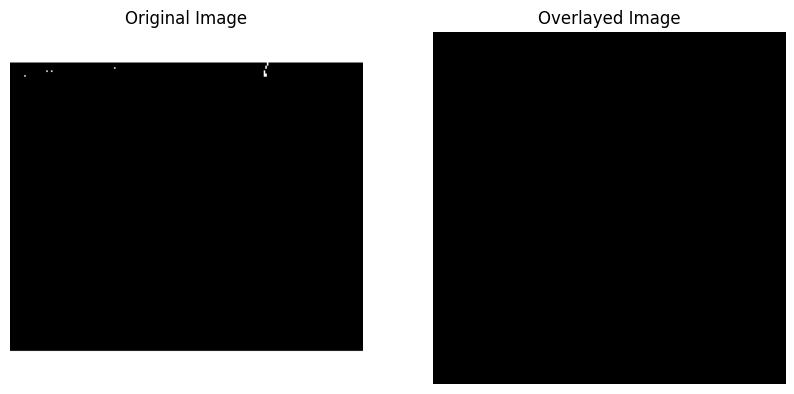

In [3]:
from datasets.cls_dataset import RSNAImageClsDataset, ChexPertImageClsDataset
from datasets.data_module import DataModule
from datasets.transforms import DataTransforms
import matplotlib.pyplot as plt

datamodule = DataModule(dataset=ChexPertImageClsDataset, 
                                config=config, collate_fn=None,
                                transforms=DataTransforms, data_pct=1.0,
                                batch_size=64, num_workers=16)

test_dataloader = datamodule.test_dataloader()

img, result = get_attention_map(test_dataloader)
print(img.shape)  # (num_samples, embedding_dim)
print(result.shape) 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img.astype("uint8"))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Overlayed Image")
plt.imshow(result)
plt.axis("off")

plt.show()

# all_images = []
# all_labels = []

# # Iterate through the DataLoader
# for batch_idx, (images, labels) in enumerate(val_dataloader):
#     if batch_idx == 50:
#         all_images.append(images)  # Collect the images
#         all_labels.append(labels)  # Collect the labels

# # Convert the list of batches to a single tensor
# all_images = torch.cat(all_images, dim=0)  # Concatenate along the batch dimension
# print(all_images.shape)
# all_labels = torch.cat(all_labels, dim=0)
# print(all_labels.shape)


Dataset size of split test: 1804


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([1, 3, 224, 224])
Labels batch shape: torch.Size([1, 1])


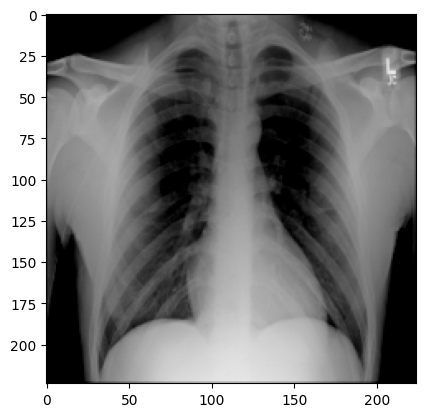

Label: tensor([0.])


In [7]:
from datasets.cls_dataset import RSNAImageClsDataset, ChexPertImageClsDataset
from datasets.data_module import DataModule
from datasets.transforms import DataTransforms
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import yaml
from train_cls import load_config
from methods.cls_model import FinetuneClassifier
import numpy as np

config = load_config('../configs/rsna.yaml')

datamodule = DataModule(dataset=RSNAImageClsDataset, 
                                config=config, collate_fn=None,
                                transforms=DataTransforms, data_pct=1.0,
                                batch_size=64, num_workers=16)

test_dataloader = datamodule.test_dataloader()

test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
img = test_features[0].squeeze()
img = np.transpose(img, (1, 2, 0)) 
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('../annotations/rsna/test.csv')
df


,path,patientId,label,bbox
0,/u/home/galc/datasets/rsna/stage_2_train_image...,f2698fda-0477-435f-b297-f1b284a731aa,0,"[[0.0, 0.0, 0.0, 0.0]]"
1,/u/home/galc/datasets/rsna/stage_2_train_image...,b76dd4b8-7b51-4cb6-8fd7-0b7365ef3e1e,0,"[[0.0, 0.0, 0.0, 0.0]]"
2,/u/home/galc/datasets/rsna/stage_2_train_image...,5d8dbcf9-0d68-4aec-8638-b0a9f45d71d6,1,"[[605.0, 435.0, 808.0, 616.0]]"
3,/u/home/galc/datasets/rsna/stage_2_train_image...,39dc2e50-46a1-409e-ad59-98c33d300f2a,0,"[[0.0, 0.0, 0.0, 0.0]]"
4,/u/home/galc/datasets/rsna/stage_2_train_image...,b8a2e49e-c1fc-4a78-96dd-0ee4f835eaaa,1,"[[588.0, 75.0, 857.0, 783.0], [205.0, 75.0, 47..."
...,...,...,...,...
3998,/u/home/galc/datasets/rsna/stage_2_train_image...,418c026a-52a8-4b5f-a11b-5dec2fae20f5,1,"[[132.0, 236.0, 336.0, 570.0]]"
3999,/u/home/galc/datasets/rsna/stage_2_train_image...,4d5ca402-e14a-4b6c-86cd-d25512b31047,1,"[[604.0, 311.0, 796.0, 492.0]]"
4000,/u/home/galc/datasets/rsna/stage_2_train_image...,00d7c36e-3cdf-4df6-ac03-6c30cdc8e85b,0,"[[0.0, 0.0, 0.0, 0.0]]"
4001,/u/home/galc/datasets/rsna/stage_2_train_image...,8489c930-19a8-4895-9211-4efd3d38ae58,1,"[[559.0, 202.0, 770.0, 381.0]]"


In [16]:
import json
import pandas as pd

test_losses = []
# Load logged losses
# with open("test_losses_convirt.json", "r") as f:
with open("test_losses_convirt.json", "r") as f:
    for line in f:
        test_losses.append(json.loads(line))

# Convert to DataFrame
loss_df = pd.DataFrame(test_losses)

loss_df

,batch_idx,loss,preds,labels
0,0,0.053896,0,0.0
1,1,0.427865,0,0.0
2,2,1.659290,0,1.0
3,3,0.009779,0,0.0
4,4,0.644334,1,1.0
...,...,...,...,...
3998,3998,0.734473,0,1.0
3999,3999,0.655805,1,1.0
4000,4000,0.073630,0,0.0
4001,4001,2.569085,0,1.0


In [ ]:
df_concat = pd.concat([df, loss_df['labels']])
df_concat

In [7]:
pneumonia = df[df["label"] == 1]
healthy = df[df["label"] == 0]

a_images = pneumonia.sample(5)["path"].tolist()
b_images = healthy.sample(5)["path"].tolist()

all_images = np.array([a_images, b_images]).flatten()

In [ ]:
from train_cls import load_config
from datasets.cls_dataset import RSNAImageTestDataset

config = load_config('../configs/rsna.yaml')

datamodule = DataModule(dataset=RSNAImageClsDataset(df), 
                                config=config, collate_fn=None,
                                transforms=DataTransforms, data_pct=1.0,
                                batch_size=64, num_workers=16)

test_dataloader = datamodule.test_dataloader()

In [ ]:
import pydicom

def get_attention_map(path, get_mask=False):
    img = pydicom.dcmread(path).pixel_array
    loss, logits, preds, y, att_mat = model.shared_step(batch)
    outputs = model(**inputs, output_attentions=True)
    logits = outputs.logits
    att_mat = outputs["attentions"]

    att_mat = torch.stack(att_mat).squeeze(1)

    # Average the attention weights across all heads.
    att_mat = torch.mean(att_mat, dim=1)

    # To account for residual connections, we add an identity matrix to the
    # attention matrix and re-normalize the weights.
    residual_att = torch.eye(att_mat.size(1))
    aug_att_mat = att_mat + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

    # Recursively multiply the weight matrices
    joint_attentions = torch.zeros(aug_att_mat.size())
    joint_attentions[0] = aug_att_mat[0]

    for n in range(1, aug_att_mat.size(0)):
        joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

    v = joint_attentions[-1]
    grid_size = int(np.sqrt(aug_att_mat.size(-1)))
    
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
    if get_mask:
        result = cv2.resize(mask / mask.max(), img.size)
    else:        
        mask = cv2.resize(mask / mask.max(), img.size)[..., np.newaxis]
        result = (mask * img).astype("uint8")

    return img, result

In [15]:
cams = []
images = []

for x in all_images:
    tmp1, tmp2 = get_attention_map(x, True)
    images.append(tmp1)
    cams.append(tmp2) 

In [17]:
all_images

array(['/u/home/galc/datasets/rsna/stage_2_train_images/7798d157-4dbf-402c-8b93-d3b97cb29d64.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/76f71a93-8105-4c79-a010-0cfa86f0061a.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/bfbbedfe-0ab1-42bd-ac7f-e67b2a8e842a.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/e813b239-43c9-426d-b768-4a88d5e2c2e4.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/70e3331c-8717-4ff6-b2b5-0fefe6336bdc.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/e1ea50ee-d841-4819-b8ed-91b37efa1c72.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/9433b6d4-c05f-4a31-b7d6-0a002ca386bc.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/8da2a62e-732f-4646-a470-9a18af1204ad.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/6fdfe34b-f264-4bec-8669-b19786a1a6e8.dcm',
       '/u/home/galc/datasets/rsna/stage_2_train_images/0a41d5c4-83b0-43e4-b98f-be69dcdd4636.dcm'],
      dty

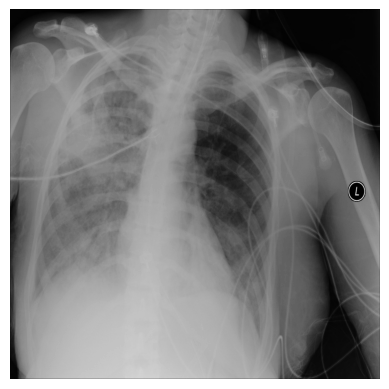

In [9]:
import pydicom
import matplotlib.pyplot as plt

images = [pydicom.dcmread(path).pixel_array for path in all_images]

plt.imshow(images[0], cmap="gray")
plt.axis('off')
plt.show()

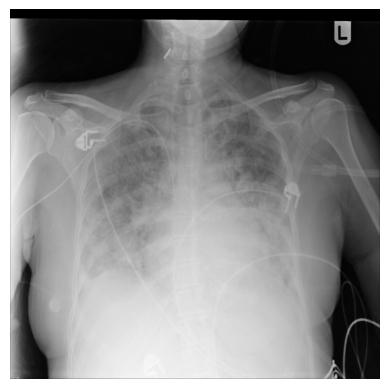

In [12]:
plt.imshow(images[4], cmap="gray")
plt.axis('off')
plt.show()

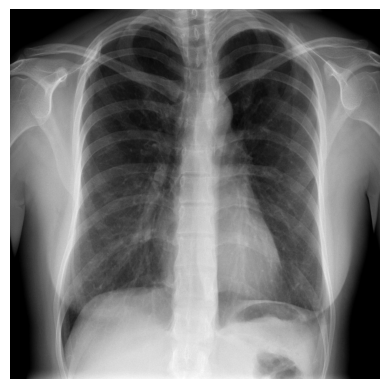

In [13]:
plt.imshow(images[9], cmap="gray")
plt.axis('off')
plt.show()

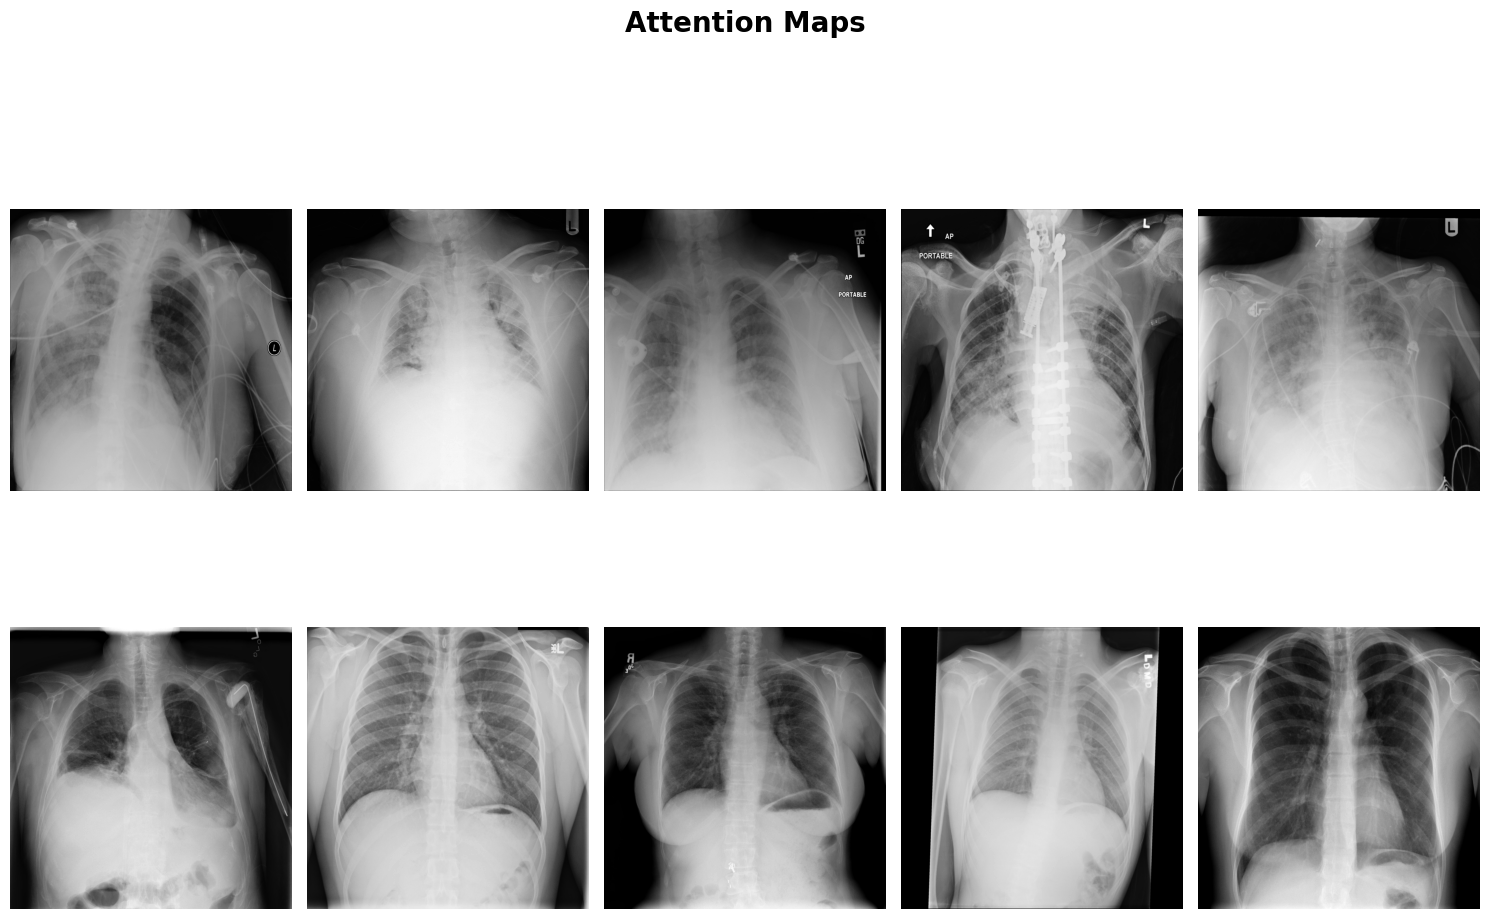

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(15,10))

for x in range(2):
    for y in range(5):
        ax[x][y].imshow(images[x*5+y], cmap="gray")
        # ax[x][y].imshow(cams[x*5+y], alpha=0.7)
        ax[x][y].axis('off')

        
plt.tight_layout()
plt.suptitle('Attention Maps',fontweight ="bold", size=20, y=1.05)
plt.show()

## Confusion Matrix

In [19]:
import json
import pandas as pd

validation_losses = []
# Load logged losses
# with open("test_losses_convirt.json", "r") as f:
with open("test_losses_medclip_balanced.json", "r") as f:
    for line in f:
        validation_losses.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(validation_losses)

df

,batch_idx,loss,preds,labels
0,0,0.085420,0,0.0
1,1,0.009812,1,1.0
2,2,1.729340,1,0.0
3,3,0.925226,1,0.0
4,4,0.053168,0,0.0
...,...,...,...,...
1799,1799,0.270553,1,1.0
1800,1800,0.050036,0,0.0
1801,1801,1.630012,0,1.0
1802,1802,0.438045,1,1.0


In [20]:
df["labels"].value_counts()

0.0    902
1.0    902
Name: labels, dtype: int64

In [21]:
df['preds'].value_counts()

1    928
0    876
Name: preds, dtype: int64

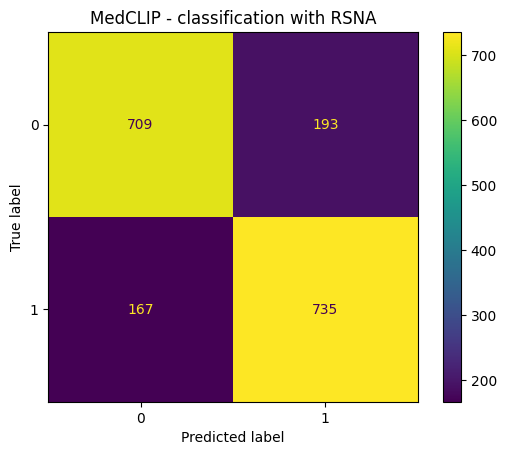

In [22]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(df['labels'], df['preds'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.title('MedCLIP - classification with RSNA')
plt.show()

In [16]:
sorted_loss_df = df.sort_values(by="loss", ascending=False)
sorted_loss_df

,batch_idx,loss,preds,labels
3728,3728,4.894003,0,1.0
153,153,4.713731,0,1.0
1217,1217,4.707642,0,1.0
1632,1632,4.428976,0,1.0
462,462,4.357889,0,1.0
...,...,...,...,...
3339,3339,0.002755,0,0.0
3150,3150,0.002608,0,0.0
3732,3732,0.002580,0,0.0
3140,3140,0.002540,0,0.0


## Embeddings plot

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import yaml
from train_cls import load_config
from methods.cls_model import FinetuneClassifier

config = load_config('../configs/chexpert.yaml')

checkpoint_path = '../data/ckpts/FinetuneCLS/chexpert/2025_01_13_17_11_53/epoch=19-step=58039.ckpt' # CONVIRT
# checkpoint_path = '../data/ckpts/FinetuneCLS/chexpert/2025_01_21_19_05_29/epoch=18-step=55137.ckpt' #MEDCLIP
checkpoint = torch.load(checkpoint_path)
finetuned_convirt = FinetuneClassifier(config)
finetuned_convirt.load_state_dict(checkpoint['state_dict'])

/u/home/galc/mgca-modified/mgca-env/lib/python3.9/site-packages/pytorch_lightning/core/lightning.py:2054: DeprecationWarning: `torch.distributed._sharded_tensor` will be deprecated, use `torch.distributed._shard.sharded_tensor` instead
  from torch.distributed._sharded_tensor import pre_load_state_dict_hook, state_dict_hook


<All keys matched successfully>

In [2]:
from datasets.cls_dataset import RSNAImageClsDataset, ChexPertImageClsDataset
from datasets.data_module import DataModule
from datasets.transforms import DataTransforms

datamodule = DataModule(dataset=ChexPertImageClsDataset, 
                                config=config, collate_fn=None,
                                transforms=DataTransforms, data_pct=1,
                                batch_size=64, num_workers=16)

In [3]:
import torch
from methods.cls_model import FinetuneClassifier

def extract_embeddings(model, dataloader):
    model.eval()  # Ensure the model is in evaluation mode
    all_feats = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            feats, labels = model.shared_step(batch, return_embeddings=True)
            all_feats.append(feats.cpu())  # Move to CPU
            all_labels.append(labels.cpu())

    # Concatenate all features and labels
    all_feats = torch.cat(all_feats)
    all_labels = torch.cat(all_labels)
    return all_feats, all_labels

In [4]:
# Assuming you have a trained model and a Trainer instance
val_dataloader = datamodule.val_dataloader()  # Validation dataloader
val_feats, val_labels = extract_embeddings(finetuned_convirt, val_dataloader)
print(val_feats.shape)  # (num_samples, embedding_dim)
print(val_labels.shape) 

Dataset size of split valid: 4234
torch.Size([4224, 768])
torch.Size([4224, 5])


In [5]:
# Assuming you have a trained model and a Trainer instance
test_dataloader = datamodule.test_dataloader()  # Test dataloader
test_feats, test_labels = extract_embeddings(finetuned_convirt, test_dataloader)
print(test_feats.shape)  # (num_samples, embedding_dim)
print(test_labels.shape) 

Dataset size of split test: 202
torch.Size([202, 2048])
torch.Size([202, 5])


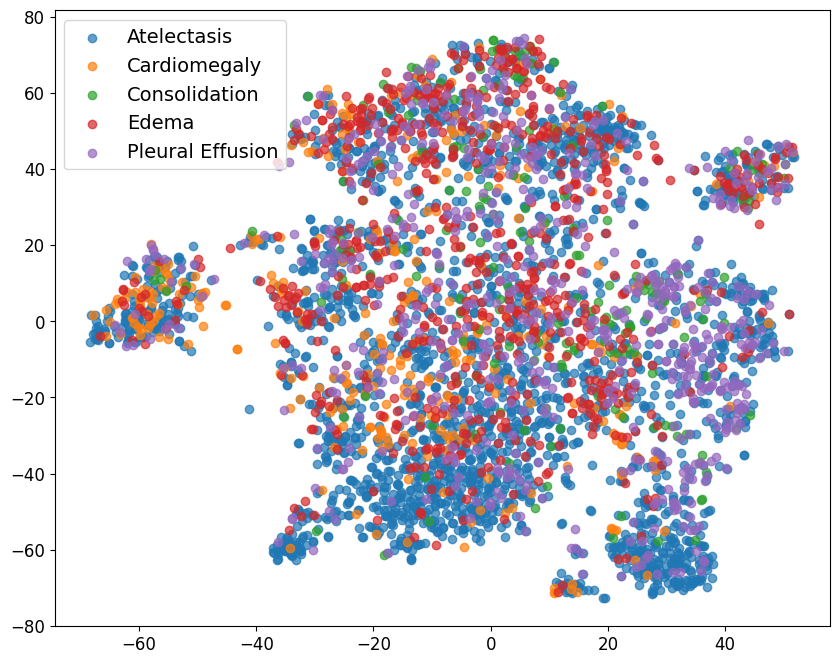

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert embeddings and labels to numpy arrays
embeddings_np = val_feats.numpy()
labels_np = val_labels.numpy()
if labels_np.ndim == 2:
        labels_np = np.argmax(labels_np, axis=1)  # Assign to the first active class
        
        
import pickle
with open('CheXpert_embeddings_ConVIRT.pkl', 'wb') as f:
    pickle.dump((embeddings_np, labels_np, embeddings_2d), f)

# Apply t-SNE to reduce dimensionality
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# embeddings_2d = tsne.fit_transform(embeddings_np)

# Visualize
def plot_embeddings_tsne(embeddings, labels, class_names):
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    for class_idx, class_name in enumerate(class_names):
        idx = labels == class_idx
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=class_name, alpha=0.7)
    
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.title("t-SNE Visualization of Image Embeddings", fontsize=16)
    plt.savefig("embeddings_medclip_balanced.pdf", format="pdf", dpi=300)
    plt.show()

class_names = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion"]
plot_embeddings_tsne(embeddings_np, labels_np, class_names)

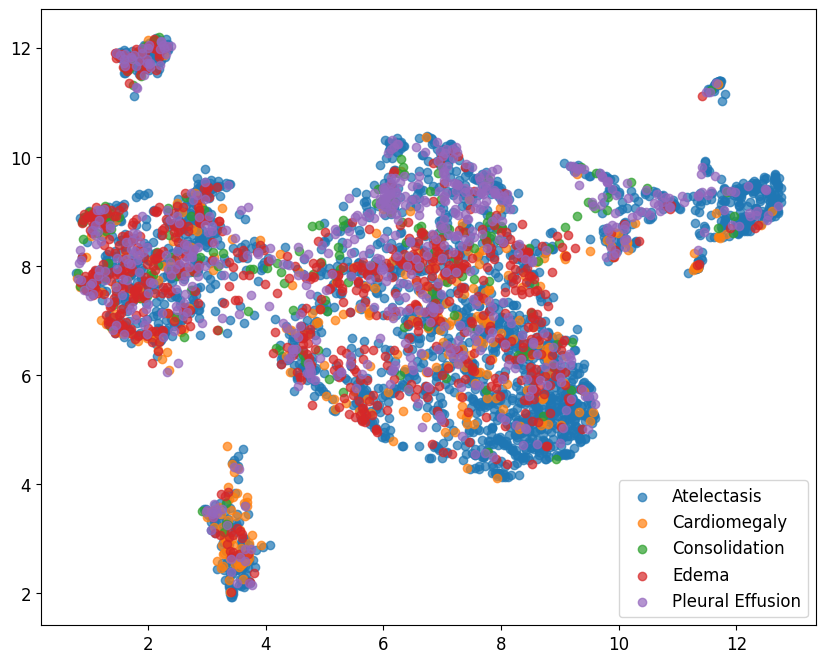

In [8]:
import umap

def plot_embeddings_umap(embeddings, labels, class_names, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean'):
    # Perform UMAP dimensionality reduction
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric, random_state=42)
    embeddings_2d = reducer.fit_transform(embeddings)
    
    # Plot the reduced embeddings
    plt.figure(figsize=(10, 8))
    for class_idx, class_name in enumerate(class_names):
        idx = labels == class_idx
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=class_name, alpha=0.7)
    
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.title("UMAP Visualization of Image Embeddings", fontsize=16)
    plt.savefig("embeddings_umap_visualization.pdf", format="pdf", dpi=300)
    plt.show()
    
plot_embeddings_umap(embeddings_np, labels_np, class_names)

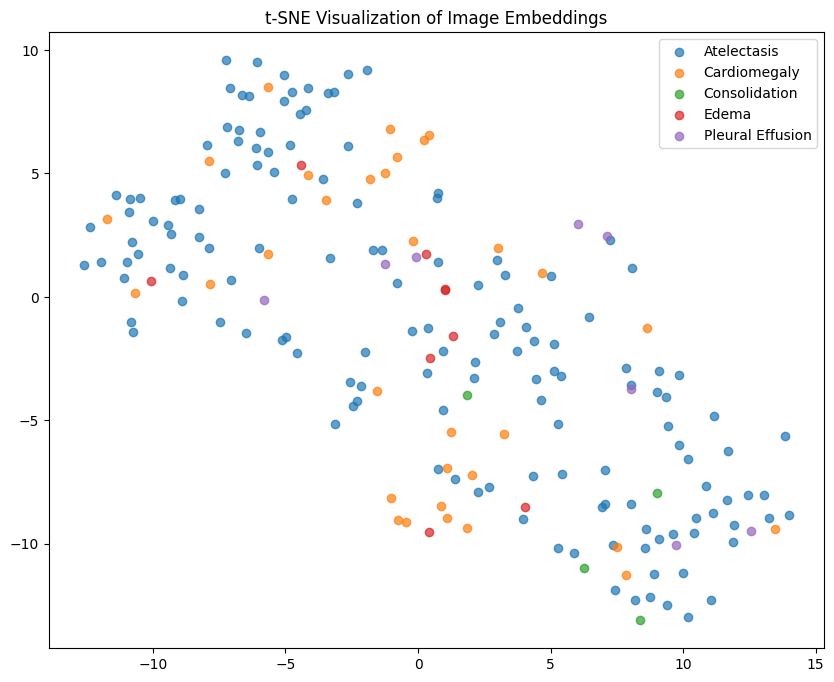

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert embeddings and labels to numpy arrays
embeddings_np = test_feats.numpy()
labels_np = test_labels.numpy()
if labels_np.ndim == 2:
        labels_np = np.argmax(labels_np, axis=1)  # Assign to the first active class

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)

# Visualize
def plot_embeddings(embeddings_2d, labels, class_names):
    plt.figure(figsize=(10, 8))
    for class_idx, class_name in enumerate(class_names):
        idx = labels == class_idx
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=class_name, alpha=0.7)
    plt.legend()
    plt.title("t-SNE Visualization of Image Embeddings")
    plt.show()

class_names = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion"]
plot_embeddings(embeddings_2d, labels_np, class_names)

In [9]:
import torch
from torchvision import transforms
from PIL import Image
import yaml
from train_cls import load_config
from methods.cls_model import FinetuneClassifier

config = load_config('../configs/chexpert.yaml')

# checkpoint_path = '../data/ckpts/FinetuneCLS/chexpert/2025_01_13_17_11_53/epoch=19-step=58039.ckpt'
# checkpoint = torch.load(checkpoint_path)
finetuned_imagenet = FinetuneClassifier(config)
# finetuned_convirt.load_state_dict(checkpoint['state_dict'])

In [10]:
# Assuming you have a trained model and a Trainer instance
val_dataloader = datamodule.val_dataloader()  # Validation dataloader
val_feats, val_labels = extract_embeddings(finetuned_imagenet, val_dataloader)
print(val_feats.shape)  # (num_samples, embedding_dim)
print(val_labels.shape) 

Dataset size of split valid: 4234
torch.Size([4224, 768])
torch.Size([4224, 5])


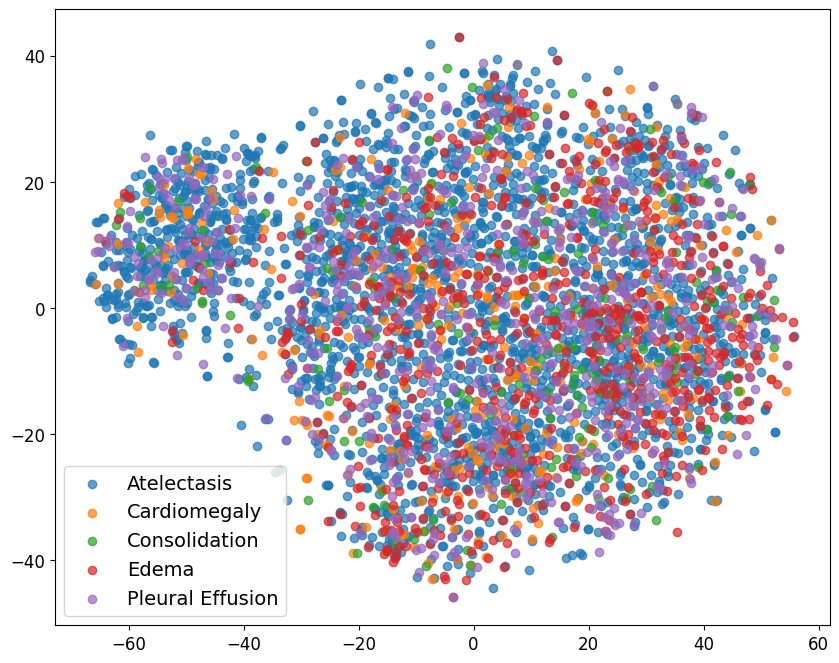

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert embeddings and labels to numpy arrays
embeddings_np = val_feats.numpy()
labels_np = val_labels.numpy()
if labels_np.ndim == 2:
        labels_np = np.argmax(labels_np, axis=1)  # Assign to the first active class

# Visualize
def plot_embeddings_tsne(embeddings, labels, class_names):
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    for class_idx, class_name in enumerate(class_names):
        idx = labels == class_idx
        plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=class_name, alpha=0.7)
    
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.title("t-SNE Visualization of Image Embeddings", fontsize=16)
    plt.savefig("embeddings_imagenet_tsne.pdf", format="pdf", dpi=300)
    plt.show()

class_names = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", "Pleural Effusion"]
plot_embeddings_tsne(embeddings_np, labels_np, class_names)

## Balance CheXpert data

In [4]:
import pandas as pd

df = pd.read_csv('../../datasets/chexpert_small/CheXpert-v1.0-small/valid.csv')
print('original-df len:', len(df))

df

original-df len: 234


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
classes = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion",
]

filtered_df = df[df[classes].any(axis=1)].copy()
filtered_df["Target"] = filtered_df[classes].idxmax(axis=1)
filtered_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Target
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiomegaly
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edema
5,CheXpert-v1.0-small/valid/patient64545/study1/...,Female,55,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Atelectasis
6,CheXpert-v1.0-small/valid/patient64546/study1/...,Male,56,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Atelectasis
10,CheXpert-v1.0-small/valid/patient64548/study1/...,Female,53,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Atelectasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,CheXpert-v1.0-small/valid/patient64733/study1/...,Male,87,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Edema
227,CheXpert-v1.0-small/valid/patient64734/study1/...,Male,45,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Atelectasis
228,CheXpert-v1.0-small/valid/patient64735/study1/...,Female,63,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Atelectasis
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Cardiomegaly


In [ ]:
print(df["Target"].value_counts())

In [4]:
import pandas as pd

def balance_classes(df, target_column="Target", sample_size=None):
    min_class_count = df[target_column].value_counts().min()
    sample_size = sample_size or min_class_count

    balanced_df = (
        df.groupby(target_column)
        .apply(lambda x: x.sample(sample_size, replace=len(x) < sample_size, random_state=42))
        .reset_index(drop=True)
    )
    return balanced_df

# List of classes to consider
CHEXPERT_COMPETITION_TASKS = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion",
]

def balance_selected_classes(df, classes, sample_size=None):
    """
    Filters for specified classes and balances the dataset.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
        classes (list): List of class names to consider.
        sample_size (int, optional): Number of samples per class. Defaults to the smallest class size.
    
    Returns:
        pd.DataFrame: A balanced DataFrame containing only the selected classes.
    """
    # Filter the DataFrame to include only relevant classes
    filtered_df = df[df[classes].any(axis=1)].copy()  # Rows with at least one selected class
    
    # Create a target column that indicates the disease type
    filtered_df["Target"] = filtered_df[classes].idxmax(axis=1)  # Assign the first positive class as the label
    
    # Balance the DataFrame
    balanced_df = balance_classes(filtered_df, target_column="Target", sample_size=sample_size)
    
    return balanced_df

# Example usage
balanced_df = balance_selected_classes(df, CHEXPERT_COMPETITION_TASKS)

# Inspect the balanced data
print(balanced_df["Target"].value_counts())


Target
Atelectasis         364
Cardiomegaly        364
Consolidation       364
Edema               364
Pleural Effusion    364
Name: count, dtype: int64


/tmp/ipykernel_2327562/2736394179.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size, replace=len(x) < sample_size, random_state=42))


In [6]:
balanced_df

,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,...,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Target
0,66226,CheXpert-v1.0-small/train/patient15930/study5/...,Female,82,Lateral,NaN,NaN,NaN,1.0,NaN,...,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Atelectasis
1,188487,CheXpert-v1.0-small/train/patient44981/study4/...,Male,71,Frontal,AP,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,Atelectasis
2,6206,CheXpert-v1.0-small/train/patient01518/study3/...,Male,71,Frontal,AP,NaN,NaN,NaN,1.0,...,NaN,-1.0,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,Atelectasis
3,32988,CheXpert-v1.0-small/train/patient08030/study1/...,Female,74,Lateral,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,Atelectasis
4,167712,CheXpert-v1.0-small/train/patient39134/study2/...,Male,69,Frontal,AP,NaN,NaN,NaN,1.0,...,NaN,-1.0,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,Atelectasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,123498,CheXpert-v1.0-small/train/patient29588/study4/...,Male,75,Frontal,PA,NaN,NaN,NaN,1.0,...,NaN,NaN,-1.0,NaN,1.0,1.0,NaN,NaN,NaN,Pleural Effusion
1816,116390,CheXpert-v1.0-small/train/patient27907/study5/...,Male,63,Lateral,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,1.0,Pleural Effusion
1817,124141,CheXpert-v1.0-small/train/patient29732/study29...,Female,42,Frontal,PA,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,Pleural Effusion
1818,181495,CheXpert-v1.0-small/train/patient42742/study4/...,Male,64,Frontal,AP,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,Pleural Effusion


In [7]:
final_df = balanced_df.drop(columns=["Target"])

# Save the DataFrame to a CSV file
output_path = "../annotations/checkpert/balanced_dataset.csv"
final_df.to_csv(output_path, index=False)